In [1]:
include("JDE_ODE_Base.jl")
using .JDE_ODE_Base
import .JDE_ODE_Base: step

using Plots, UnPack

In [2]:
struct BackwardEuler <: ODEIntegrator end

#Method implementation for Forward Euler

struct ForwardEuler <: ODEIntegrator end
function step(problem::ODEProblem, ::ForwardEuler, yₙ::Float64, tₙ::Float64)
    @unpack f, h = problem
    return yₙ + h*f(yₙ,tₙ)
end
#Method implementation for Backward Euler
function step(problem::ODEProblem,::BackwardEuler, yₙ::Float64, tₙ::Float64)
   #Implement the Backward Euler method.
end

step (generic function with 2 methods)

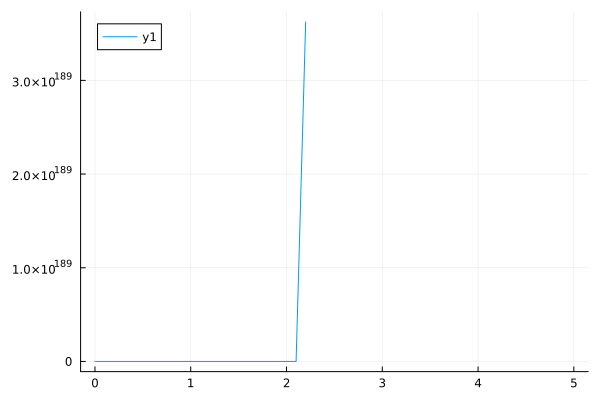

In [7]:
function f(y,t)
    γ = 1.5
    return -y + γ*y^2
end

system = ODEProblem(f,1.0,5.0,0.1)
integrator = ForwardEuler()
solution = solve(system,integrator)

plot(solution.t,solution.y)